<font size = 6>ETF資訊爬蟲與視覺化</font>

ETF在這一兩年快速崛起，成為年輕族群與小資族投資的首選之一，
截止目前已有兩百多擋不同標的ETF供投資者參考，
設計此程式碼目的為幫助使用者快速了解欲查詢ETF的基本資訊與成份股等相關重要指標。

此程式碼是基於網站MoneyDJ理財網（https://www.moneydj.com/）作為擷取對象，
透過Python裡的BeautifulSoup與requests為擷取工具，Pandas為清理與存取欲採納資料之工具，
後以同樣內建的Matplotlib作為資料視覺化方法。

只要按下'全部執行'鍵並輸入欲查詢ETF代號（國內外皆可），就可以得出以下幾筆文件：
1. 持股分佈（依區域） .xlsx
2. 持股分佈（依產業）.xlsx
3. 前十大成分股.xlsx
4. 近30日淨值市值.xlsx
5. 淨值市值最新資訊分析.xlsx
6. 基本資訊.xlsx
7. 資料統計圖表.png

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

##


<font size = 5>資料查詢與擷取</font>

<font size = '4'>查詢ETF代號</font>

In [2]:
print('輸入欲查詢ETF代號。')
search_term = input('>')

if search_term[:2] == '00':
    url = f'https://www.moneydj.com/etf/x/basic/basic0007.xdjhtm?etfid={search_term}.tw'
    
else:
    url = f'https://www.moneydj.com/etf/x/basic/basic0007.xdjhtm?etfid={search_term}'


header = {
        'User-Agent' : 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/103.0.0.0 Safari/537.36'
    }

r = requests.get(url, headers = header)
soup = BeautifulSoup(r.content.decode('utf-8'), 'lxml')
print(soup.title.text.strip())

輸入欲查詢ETF代號。
中國信託電池及儲能科技ETF基金-00902.TW-ETF持股狀況 - FundDJ基智網 - MoneyDJ理財網


##

##

<font size = '4'>持股分佈(依區域)</font>

In [4]:
try:
    country_items = soup.find('table', class_ = 'datalist', id = 'ctl00_ctl00_MainContent_MainContent_stable').tbody.find_all('tr')

    countrylist = []

    for items in country_items:

        country = items.find('td', class_ = 'col02').text
        c_invest_amount = items.find('td', class_ = 'col03').text.replace(',', '')
        c_proportion = items.find('td', class_ = 'col04').text

        info = {
            '國家': country,
            '投資金額(萬)': c_invest_amount,
            '比例(%)': c_proportion
        }

        countrylist.append(info)


    c_df = pd.DataFrame(countrylist)
    c_df.to_excel(f'{search_term}持股分佈(依區域).xlsx')
    print(f'{search_term}持股分佈(依區域).xlsx Saved.')
    print(c_df)
    
except:
    print('查無資料。')

00902持股分佈(依區域).xlsx Saved.
   國家    投資金額(萬)  比例(%)
0  中國  347441.80  43.89
1  韓國  183734.90  23.21
2  美國  157848.90  19.94
3  智利   43301.60   5.47
4  日本   39422.70   4.98
5  現金    9974.40   1.26
6  臺灣    9895.20   1.25


<font size = '4'>持股分佈(依產業)</font>

In [5]:
try:   
    industry_items = soup.find('table', class_ = 'datalist', id = 'ctl00_ctl00_MainContent_MainContent_stable2').tbody.find_all('tr')

    industrylist = []


    for items in industry_items:

        industry = items.find('td', class_ = 'col02').text
        i_invest_amount = items.find('td', class_ = 'col03').text.replace(',', '')
        i_proportion = items.find('td', class_ = 'col04').text

        info = {
            '產業': industry,
            '投資金額(萬)': i_invest_amount,
            '比例(%)': i_proportion
        }

        industrylist.append(info)


    i_df = pd.DataFrame(industrylist)
    i_df.to_excel(f'{search_term}持股分佈(依產業).xlsx')
    print(f'{search_term}持股分佈(依產業).xlsx Saved.')
    print(i_df)

except:
    print('查無資料。')

00902持股分佈(依產業).xlsx Saved.
     產業    投資金額(萬)  比例(%)
0   原物料  383064.70  48.39
1    工業  262026.10  33.10
2  資訊科技  136554.40  17.25
3    現金    9974.40   1.26


##

<font size = '4'>前十成分股</font>

In [6]:
try:
    company_items = soup.find('table', class_ = 'datalist', id = 'ctl00_ctl00_MainContent_MainContent_stable3').tbody.find_all('tr')

    companylist = []

    for items in company_items:

        company_name = items.find('td', class_ = 'col05').text
        ratio = items.find('td', class_ = 'col06').text
        share_holded = items.find('td', class_ = 'col07').text.replace(',', '')

        info = {
            '公司名稱': company_name,
            '投資比例(%)': ratio,
            '持股股數': share_holded
        }

        companylist.append(info)


    com_df = pd.DataFrame(companylist)
    com_df.to_excel(f'{search_term}前十成分股.xlsx')
    print(f'{search_term}前十成分股.xlsx Saved.')
    print(com_df)

except:
    print('查無資料。')

00902前十成分股.xlsx Saved.
                 公司名稱 投資比例(%)       持股股數
0                雅保公司   12.96  114650.00
1                三星電管   10.09   53520.00
2            LG化學有限公司    9.28   46550.00
3                寧德時代    8.64  292564.00
4            基內瑞克控股公司    5.79   62200.00
5               TDK公司    5.74  382600.00
6            智利化工礦業公司    5.64  134000.00
7  LG Energy Solution    4.96   34000.00
8                天齊鋰業    4.01  573927.00
9                億緯鋰能    3.92  675392.00


##

##

<font size = '5'>淨值分析</font>

In [7]:
if search_term[:2] == '00':
    url = f'https://www.moneydj.com/etf/x/basic/basic0003.xdjhtm?etfid={search_term}.tw'
    
else:
    url = f'https://www.moneydj.com/etf/x/basic/basic0003.xdjhtm?etfid={search_term}'


header = {
        'User-Agent' : 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/103.0.0.0 Safari/537.36'
    }

r = requests.get(url, headers = header)
soup = BeautifulSoup(r.content.decode('utf-8'), 'lxml')

##

In [10]:
# 市價
try:
    if search_term[:2] == '00':
        mc = soup.find('table', id = 'ctl00_ctl00_MainContent_MainContent_stable').find_all('tr')[1].find_all('td')
        mclist = []

        mc_date = mc[0].text.strip()
        mc_price = mc[1].text.strip()
        mc_move_pct = mc[3].text.strip()
        mc_high = mc[4].text.strip()
        mc_low = mc[5].text.strip()

        info = {
            '項目': mc_date,
            '價格': mc_price,
            '漲跌幅(%)': mc_move_pct,
            '最高價格(年)': mc_high,
            '最低價格(年)': mc_low
        }
    
    else:
        mc = soup.find('table', id = 'ctl00_ctl00_MainContent_MainContent_stable').find_all('tr')[1].find_all('td')
        mclist = []

        mc_date = mc[0].text.strip()
        mc_price = mc[1].text.strip()
        mc_move_pct = mc[3].text.strip()
        mc_high = mc[4].text.strip()
        mc_low = mc[5].text.strip()

        info = {
            '項目': mc_date,
            '價格': mc_price,
            '漲跌幅(%)': mc_move_pct,
            '最高價格(年)': mc_high,
            '最低價格(年)': mc_low
        }


    mclist.append(info)

    mc_df = pd.DataFrame(mclist)
    print(mc_df)
    
except:
    print('查無資料。')

               項目           價格 漲跌幅(%)  最高價格(年)  最低價格(年)
0  市價(2022/09/19)  14.0100(台幣)   0.07  15.2700  11.4300


In [11]:
# 淨值
try:
    net = soup.find('table', id = 'ctl00_ctl00_MainContent_MainContent_stable').find_all('tr')[2].find_all('td')
    netlist = []

    net_date = net[0].text.strip()
    net_price = net[1].text.strip()
    net_move_pct = net[3].text.strip()
    net_high = net[4].text.strip()
    net_low = net[5].text.strip()



    info = {
        '項目': net_date,
        '價格': net_price,
        '漲跌幅(%)': net_move_pct,
        '最高價格(年)': net_high,
        '最低價格(年)': net_low
    }

    netlist.append(info)

    net_df = pd.DataFrame(netlist)
    print(net_df)

except:
    print('查無資料。')


               項目           價格 漲跌幅(%)  最高價格(年)  最低價格(年)
0  淨值(2022/09/16)  13.9500(台幣)  -1.48  15.3700  11.0900


##

<font size = 4>資料合併與輸出</font>

In [12]:
try:
    mc_net_df = pd.concat([mc_df, net_df], axis = 0)
    mc_net_df = mc_net_df.set_index('項目')
    print(mc_net_df)
    mc_net_df.to_excel(f'{search_term}淨值最新資訊分析.xlsx')


except:
    print('查無資料。')

                         價格 漲跌幅(%)  最高價格(年)  最低價格(年)
項目                                                  
市價(2022/09/19)  14.0100(台幣)   0.07  15.2700  11.4300
淨值(2022/09/16)  13.9500(台幣)  -1.48  15.3700  11.0900


##

##

<font size = '4'>近30日淨值資料擷取與合併輸出</font>

In [13]:
first = soup.find_all('div', style = 'float: left; width: 330px;')[0]
first_15 = first.find('table', id = 'Repeater1').find_all('tr')

first_net_mc_list = []

for item in first_15[1:]:

    date = item.find('td', class_ = 'col07').text.strip()
    net = item.find('td', class_ = 'col08').text.strip()
    mc = item.find('td', class_ = 'col09').text.strip()

    info = {
        '日期': date,
        '淨值': net,
        '市值': mc
    }

    first_net_mc_list.append(info)

In [14]:
last = soup.find_all('div', style = 'float: left; width: 330px;')[-1]
last_15 = last.find('table', id = 'Repeater2').find_all('tr')

last_net_mc_list = []

for item in last_15[1:]:

    date = item.find('td', class_ = 'col10').text.strip()
    net = item.find('td', class_ = 'col11').text.strip()
    mc = item.find('td', class_ = 'col12').text.strip()

    info = {
        '日期': date,
        '淨值': net,
        '市值': mc
    }

    last_net_mc_list.append(info)

In [17]:
first_df = pd.DataFrame(first_net_mc_list)
last_df = pd.DataFrame(last_net_mc_list)

fnm_30_df = pd.concat([first_df, last_df], axis = 0)
fnm_30_df = fnm_30_df.set_index('日期')
fnm_30_df.to_excel(f'{search_term}近30日淨值.xlsx')
print(fnm_30_df.head())


                 淨值       市值
日期                          
2022/09/16  13.9500  14.0000
2022/09/15  14.1600  14.3800
2022/09/14  14.6400  14.4700
2022/09/13  14.6700  14.6800
2022/09/12      N/A  14.4900


##

##

<font size = 5>資料整理與視覺化</font>

00902資料統計圖表.png Saved.


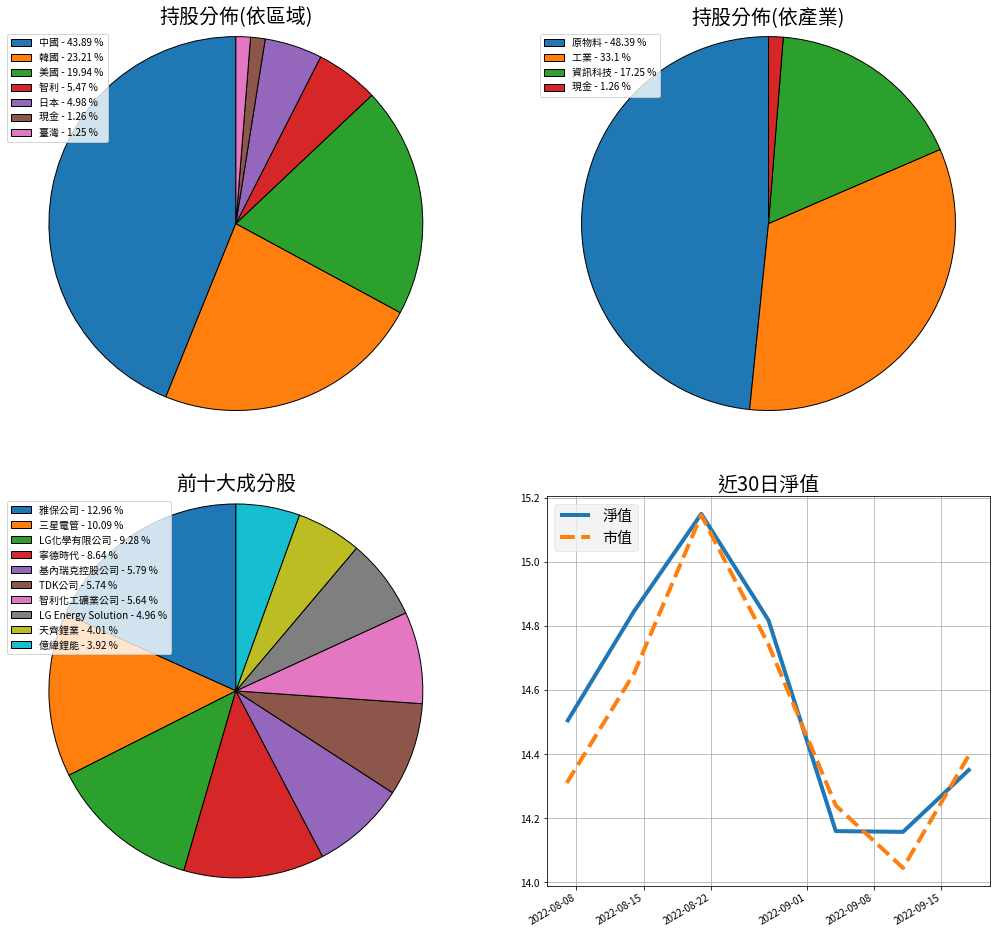

In [18]:
fig, ([ax1, ax2], [ax3, ax4]) = plt.subplots(nrows = 2, ncols = 2, figsize=(17.5,17.5))

try:
    data = pd.read_excel(f'{search_term}持股分佈(依區域).xlsx')
    country = np.array(data['國家'])
    invested_money = np.array(data['投資金額(萬)'])
    percent = np.array(data['比例(%)'])

    patches, texts = ax1.pie(invested_money, startangle=90, radius=1.2, wedgeprops = {'edgecolor': 'Black'})
    labels = ['{0} - {1} %'.format(i,j) for i,j in zip(country, percent)]

    sort_legend = True
    if sort_legend:
        patches, labels, dummy =  zip(*sorted(zip(patches, labels, invested_money),
                                              key=lambda x: x[2],
                                              reverse=True))

    ax1.legend(patches, labels, loc='upper left', bbox_to_anchor=(-0.1, 1.),
               fontsize=10)
    ax1.set_title('持股分佈(依區域)', fontsize = 20)
except:
    ax1.set_title('查無資料', fontsize = 15)





try:
    data = pd.read_excel(f'{search_term}持股分佈(依產業).xlsx')
    industry = np.array(data['產業'])
    invested_money = np.array(data['投資金額(萬)'])
    percent = np.array(data['比例(%)'])

    patches, texts = ax2.pie(invested_money, startangle=90, radius=1.2, wedgeprops = {'edgecolor': 'Black'})
    labels = ['{0} - {1} %'.format(i,j) for i,j in zip(industry, percent)]

    sort_legend = True
    if sort_legend:
        patches, labels, dummy =  zip(*sorted(zip(patches, labels, invested_money),
                                              key=lambda x: x[2],
                                              reverse=True))

    ax2.legend(patches, labels, loc='upper left', bbox_to_anchor=(-0.1, 1.),
               fontsize=10)
    ax2.set_title('持股分佈(依產業)', fontsize = 20)
except:
    ax2.set_title('查無資料', fontsize = 15)





try:
    data = pd.read_excel(f'{search_term}前十成分股.xlsx')
    company = np.array(data['公司名稱'])
    invested_money = np.array(data['投資比例(%)'])
    percent = np.array(data['投資比例(%)'])

    patches, texts = ax3.pie(percent, startangle=90, radius=1.2, wedgeprops = {'edgecolor': 'Black'})
    labels = ['{0} - {1} %'.format(i,j) for i,j in zip(company, percent)]

    sort_legend = True
    if sort_legend:
        patches, labels, dummy =  zip(*sorted(zip(patches, labels, invested_money),
                                              key=lambda x: x[2],
                                              reverse=True))

    ax3.legend(patches, labels, loc='upper left', bbox_to_anchor=(-0.1, 1.),
               fontsize=10)
    ax3.set_title('前十大成分股', fontsize = 20)
except:
    ax3.set_title('查無資料', fontsize = 15)





try:
    plt.style.use('fivethirtyeight')
    data = pd.read_excel(f'{search_term}近30日淨值.xlsx')
    data['日期'] = pd.to_datetime(data['日期'])
    weekly = data.resample('W', on = '日期').mean()
    weekly['日期_1'] = list(weekly.index)
    date = weekly['日期_1']
    net = weekly['淨值']
    mc = weekly['市值']

    plt.gcf().autofmt_xdate() 

    ax4.plot(date, net, label = '淨值')
    ax4.plot(date, mc, linestyle = '--', label = '市值')


    ax4.legend(loc='upper left',
               fontsize=15)

    ax4.set_title('近30日淨值', fontsize = 20)
except:
    ax4.set_title('查無資料', fontsize = 15)


plt.grid(True)
plt.savefig(f'{search_term}資料統計圖表.png')
print(f'{search_term}資料統計圖表.png Saved.')

##

##

<font size = '5'>基本資訊</font>

In [19]:
if search_term[:2] == '00':
    url = f'https://www.moneydj.com/etf/x/basic/basic0004.xdjhtm?etfid={search_term}.tw'
    
else:
    url = f'https://www.moneydj.com/etf/x/basic/basic0004.xdjhtm?etfid={search_term}'


header = {
        'User-Agent' : 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/103.0.0.0 Safari/537.36'
    }

r = requests.get(url, headers = header)

soup = BeautifulSoup(r.content.decode('utf-8'), 'lxml')
table = soup.find('table', id = 'sTable', myid = 'sTable', class_ = 'DataTable')

name = table.find_all('tr')[0].find_all('td')[0].text
id = table.find_all('tr')[0].find_all('td')[1].text
eng_name = table.find_all('tr')[1].find_all('td')[0].text
unit = table.find_all('tr')[1].find_all('td')[1].text
pub_company = table.find_all('tr')[2].find_all('td')[0].text
transac_place = table.find_all('tr')[2].find_all('td')[1].text
est_date = table.find_all('tr')[3].find_all('td')[0].text
currency = table.find_all('tr')[3].find_all('td')[1].text
scale = table.find_all('tr')[4].find_all('td')[0].text
volume = table.find_all('tr')[5].find_all('td')[0].text
keeper_bank = table.find_all('tr')[14].find_all('td')[0].text
keeper = table.find_all('tr')[15].find_all('td')[0].text
index = table.find_all('tr')[16].find_all('td')[0].text
base_index = table.find_all('tr')[17].find_all('td')[0].text

fee = table.find_all('tr')[9].find_all('td')[0].text
total_fee = table.find_all('tr')[10].find_all('td')[0].text



info = {
    '項目' : 
    ['ETF名稱','交易所代碼','英文名稱','交易單位','發行公司','交易所','成立日期',
    '計價幣別','ETF規模','成交量(股)','保管機構','經理人','追蹤指數','基準指數',
    '管理費(%)','總管理費(%)'],
    '' :
    [name, id, eng_name, unit, pub_company, transac_place, est_date, currency,
    scale, volume, keeper_bank, keeper, index, base_index, fee, total_fee]

}

df = pd.DataFrame(info)
df = df.set_index('項目')
df.to_excel(f'{search_term}基本資料.xlsx')
print(df)

                                                       
項目                                                     
ETF名稱                                  中國信託電池及儲能科技ETF基金
交易所代碼                                             00902
英文名稱     CTBC Battery and Energy Storage Technology ETF
交易單位                                           1000 股/張
發行公司                                             中國信託投信
交易所                                                 TSE
成立日期                                  2022/01/18（已成立1年）
計價幣別                                                 台幣
ETF規模                        7,210.70(百萬台幣)(2022/08/31)
成交量(股)                          7,648,213（月均:5,715,524）
保管機構                                            華南商業銀行 
經理人                                                 詹佳
追蹤指數                               ICE FactSet電池與儲能科技指數
基準指數                    Battery Metals and Mining Index
管理費(%)                                              0.9
總管理費(%)                                         